In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!pip install tensorflow-datasets

In [4]:
!pip install matplotlib


In [5]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist', split='train')

In [7]:
ds.as_numpy_iterator().next()['image'][0]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 18],
       [ 77],
       [227],
       [227],
       [208],
       [210],
       [225],
       [216],
       [ 85],
       [ 32],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [8]:
import numpy as np


In [9]:
dataiterator = ds.as_numpy_iterator()

In [10]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

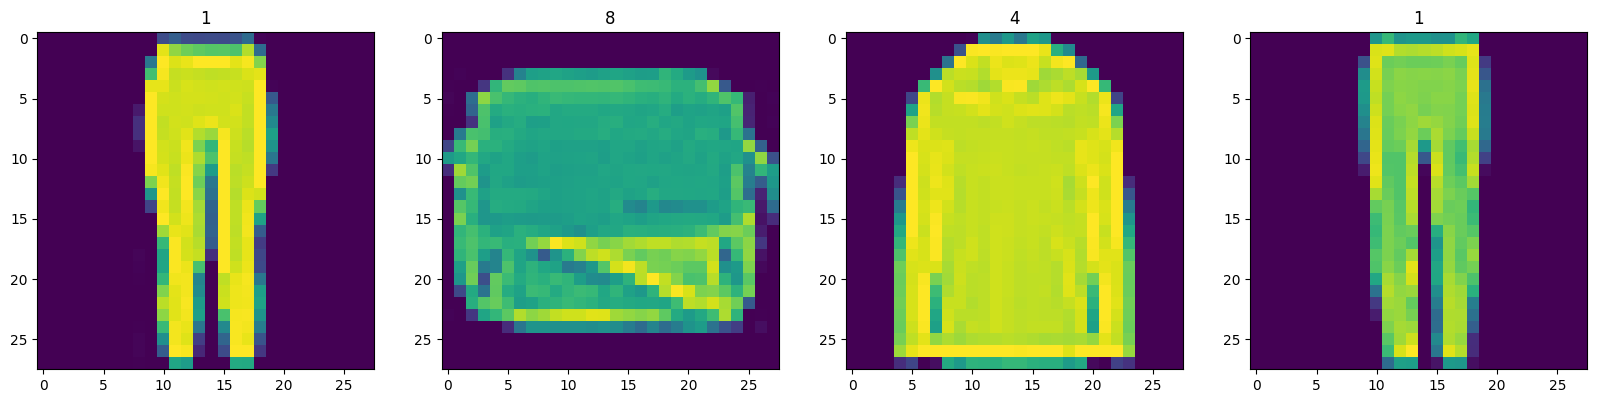

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4): 
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [12]:
def scale_images(data): 
    image = data['image']
    return image / 255

In [13]:
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images) 
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [14]:
import tensorflow as tf

# Build the Nural Network

In [15]:
#for the generator and discriminator
from tensorflow.keras.models import Sequential
# layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

# Build Generator

In [16]:
def build_generator():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(7*7*128, input_dim=128),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Reshape((7, 7, 128)),
        
         # Upsampling block 1
        tf.keras.layers.UpSampling2D(),
        tf.keras.layers.Conv2D(128, 5, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        # Upsampling block 2
        tf.keras.layers.UpSampling2D(),
        tf.keras.layers.Conv2D(128, 5, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        
        # Convolutional block 1
        tf.keras.layers.Conv2D(128, 4, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        # Convolutional block 2
        tf.keras.layers.Conv2D(128, 4, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        # Conv layer to get to one channel
        tf.keras.layers.Conv2D(1, 4, padding='same', activation='sigmoid')
    ])
    
    return model

In [17]:
generator = build_generator()


In [18]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [19]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [20]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 5s 5s/step


In [22]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 33ms/step


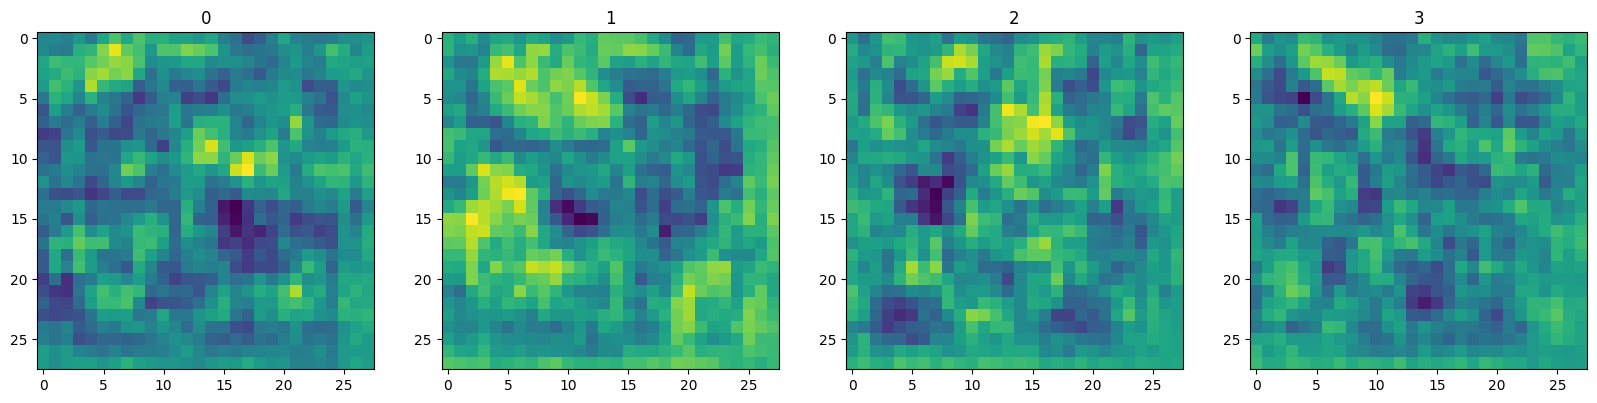

In [23]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img): 
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

# Build Discriminater

In [21]:
def build_discriminator():
    model = tf.keras.models.Sequential([
        # First Conv Block
        tf.keras.layers.Conv2D(32, 5, input_shape=(28, 28, 1)),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dropout(0.4),
        
        # Second Conv Block
        tf.keras.layers.Conv2D(64, 5),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dropout(0.4),
        
        # Third Conv Block
        tf.keras.layers.Conv2D(128, 5),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dropout(0.4),
        
        # Fourth Conv Block
        tf.keras.layers.Conv2D(256, 5),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dropout(0.4),
        
        # Flatten
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        
        # Dense layer with sigmoid activation
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model


In [22]:
discriminator = build_discriminator()

In [23]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [24]:
img.shape

(4, 28, 28, 1)

In [25]:
discriminator.predict(img)

1/1 [==============================] - 0s 408ms/step


array([[0.49867463],
       [0.49856034],
       [0.49878228],
       [0.49888277]], dtype=float32)

# Construct Training Loop

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [28]:
from tensorflow.keras.models import Model

In [29]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [30]:
fashgan = FashionGAN(generator, discriminator)

In [31]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

# Build a Callback

In [32]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [33]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [34]:
hist = fashgan.fit(ds, epochs=1000)

Epoch 1/1000
469/469 [==============================] - 76s 149ms/step - d_loss: 0.5902 - g_loss: 0.8008
Epoch 2/1000
469/469 [==============================] - 70s 150ms/step - d_loss: 0.3530 - g_loss: 5.6188
Epoch 3/1000
469/469 [==============================] - 73s 155ms/step - d_loss: 0.2824 - g_loss: 7.3056
Epoch 4/1000
469/469 [==============================] - 71s 152ms/step - d_loss: 0.2768 - g_loss: 6.7742
Epoch 5/1000
469/469 [==============================] - 72s 153ms/step - d_loss: 0.2747 - g_loss: 6.1528
Epoch 6/1000
469/469 [==============================] - 72s 155ms/step - d_loss: 0.2734 - g_loss: 5.7243
Epoch 7/1000
469/469 [==============================] - 74s 158ms/step - d_loss: 0.2720 - g_loss: 5.3279
Epoch 8/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6321 - g_loss: 1.1019
Epoch 9/1000
469/469 [==============================] - 77s 164ms/step - d_loss: 0.5844 - g_loss: 0.3338
Epoch 10/1000
469/469 [==============================] 

In [36]:
generator.save('generator.h5')

In [37]:
discriminator.save('discriminator.h5')

In [38]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 380ms/step


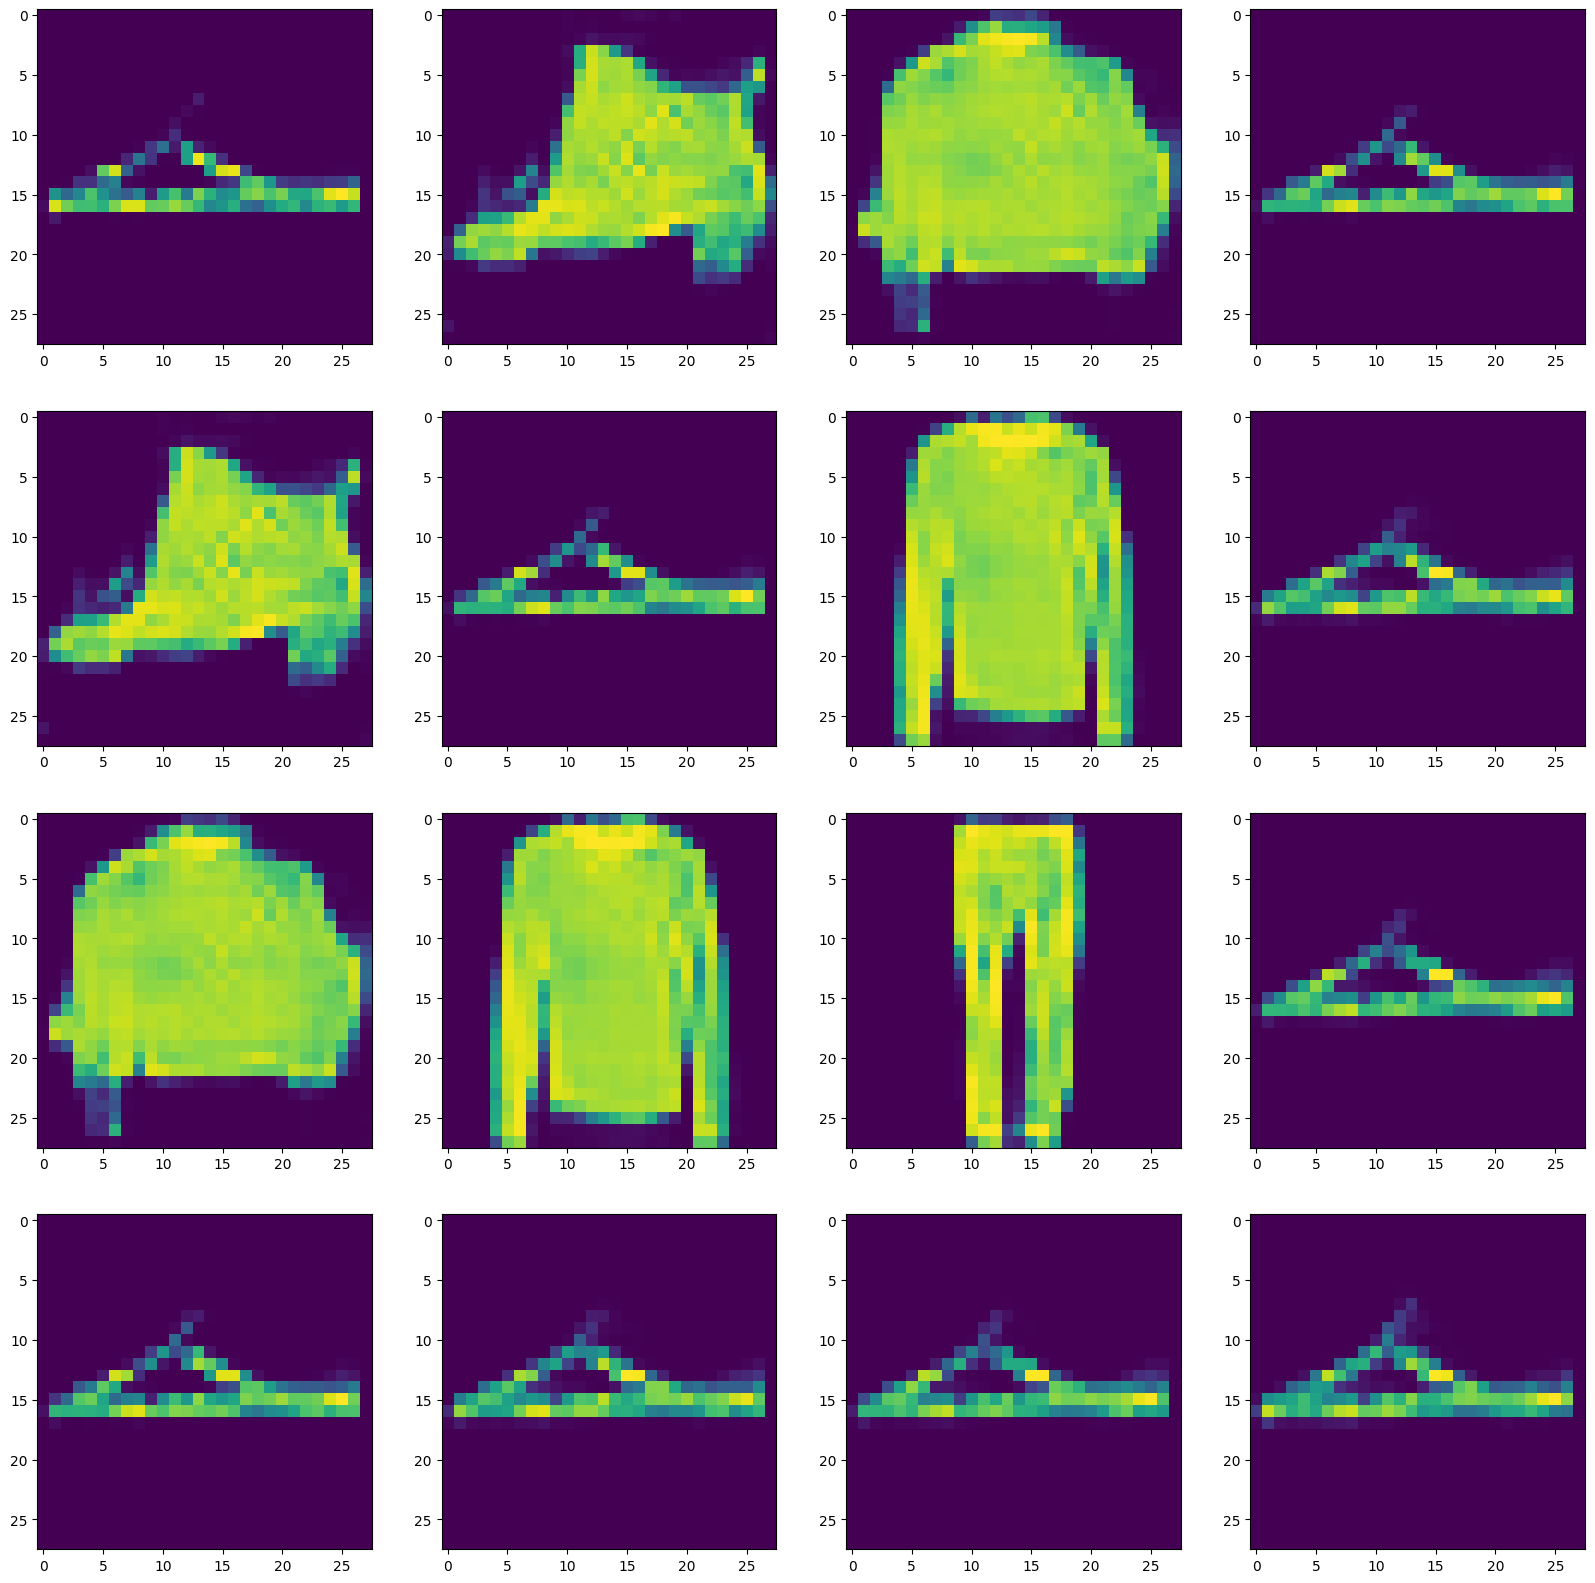

In [39]:
fig,ax = plt.subplots(ncols = 4,nrows = 4,figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])